# Relational Algebra

- procedural language
- basic operators
    - select $\sigma$
    - project $\Pi$
    - union $\cup$
    - set difference $-$
    - cartesian product $\times$
    - rename $\rho$
- opeartors take one or two relations as inputs and output a single relation

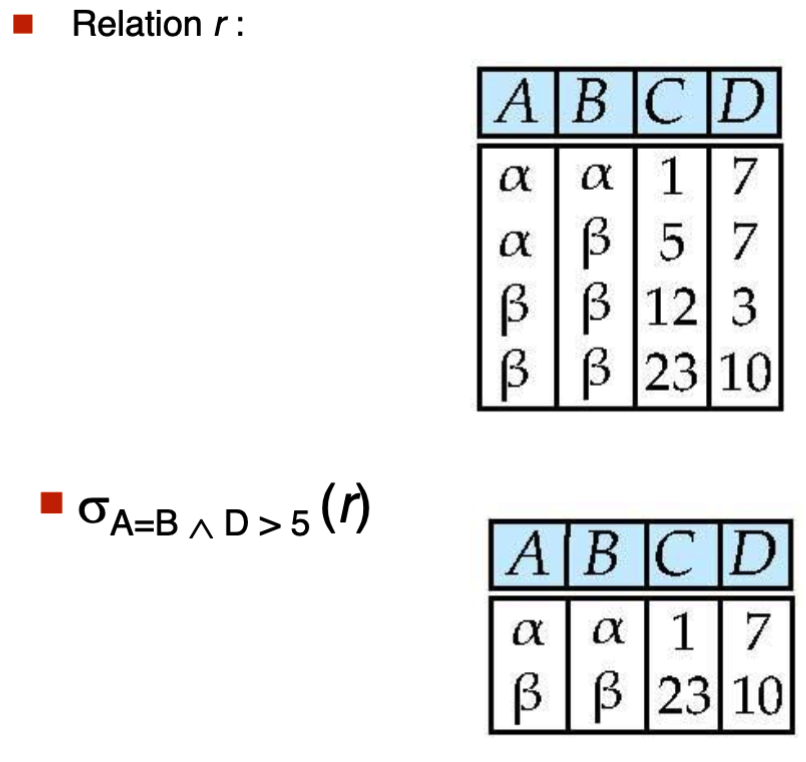

# Select Opeartion

- notation: $\sigma_{p}(r)$
- $p$ is called the **selection predicate**
- defined as
\begin{equation*}
\sigma_{p}(r)=\{t|t \in r \land p(t)\}
\end{equation*}
- where $p$ is a formula in propositional logic consisting of **terms** connected by **and $\land$, or $\lor$, not $\lnot$**
- each term is one of: \<attribute\> op \<attribute\> or \<constant\>
- where *op* is one of: $=,\ne,>,\leq,<,\geq$
- example: $\sigma_{dept\_name}=\"Physics\"(instructor)$



# Project Operation

- notation: $\Pi_{A_1, A_2, ..., A_k}(r)$
    - where $A_1, A_2$ are attribute names and $r$ is a relation name
- the result is defined as the relation of $k$ columns obtained by erasing the columns that are not listed
- since relation are sets, duplicate rows "removed" from result
- example: to eliminate the $dept\_name$ attribute of instructor
    - $\Pi_{ID, name, salary}(instructor)$

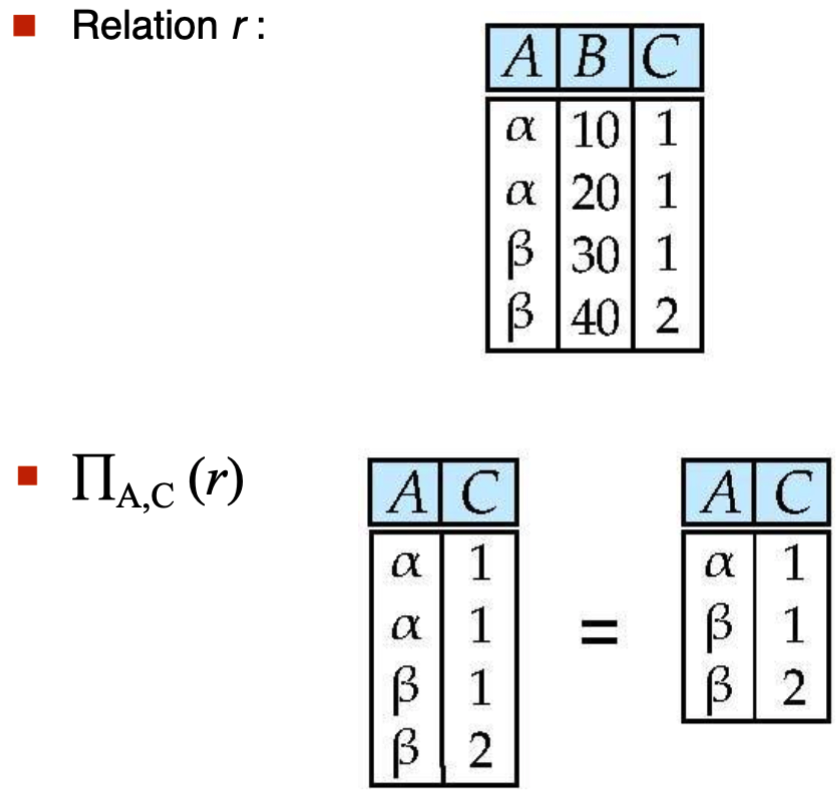

# Union Operation

- notation: $r \cup s$
- defined as: $r \cup s = \{t|t \in r \lor t \in s\}$
- for $r \cup s$ to be valid
    1. $r, s$ must have the same **arity** (same number of attributes)
    2. the attribute domains must be **compatible** (e.g., 2nd column of $r$ deals with the same type of values as does the 2nd column of s)
- example, to find all courses taught in Fall 2009 or Spring 2010 or both
    - $\Pi_{course\_id}(\sigma_{semester="Fall" \land year=2009}(section)) \cup \Pi_{course\_id}(\sigma_{semester="Spring" \land year=2010}(section))$

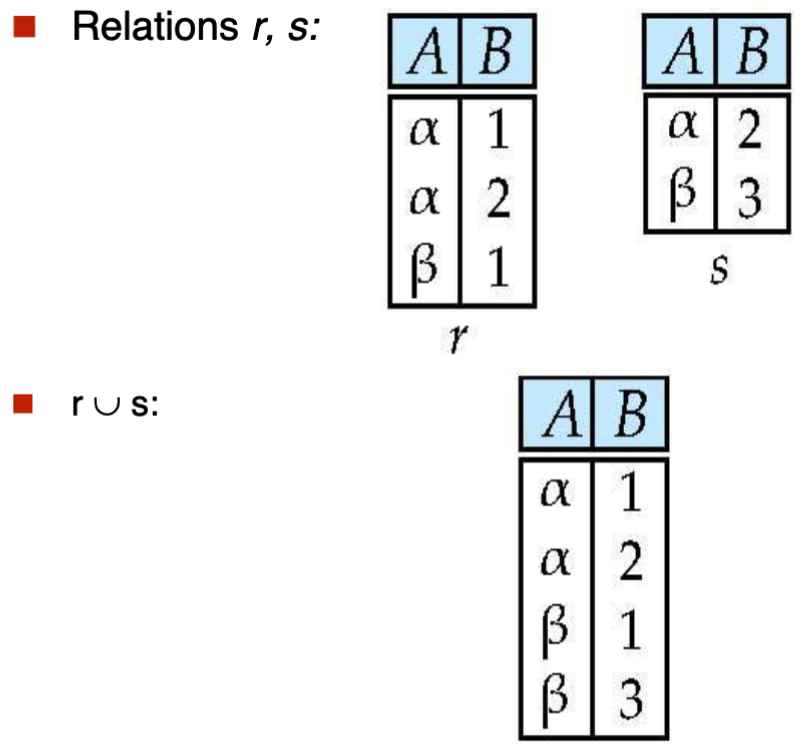



# Set Difference of two relations

- notation: $r - s$
- defined as: $r-s=\{t|t\in r \land t \notin s\}$
- set differences must be taken between compatible relations, similar to unions
- example: to find all courses taught in Fall 2009 but not in Spring 2010
    - $\Pi_{course\_id}(\sigma_{semester="Fall" \land year=2009}(section)) - \Pi_{course\_id}(\sigma_{semester="Spring" \land year=2010}(section))$

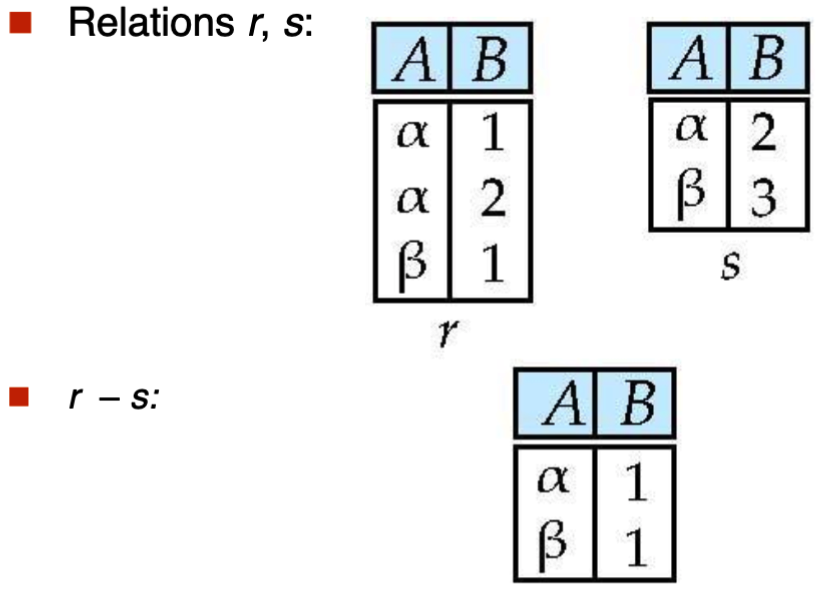

# Cartesian-Product Operation

- notation: $r \times s$
- defined as: $r \times s = \{tq|t\in r\land q \in s\}$
    - $tq$ denotes a tuple obtained by concatenating together $t$ and $q$
- the definition assumes that attributes of $r(R)$ and $s(S)$ are disjoint ($R\cap S = \emptyset$)
- if attributes of $r(R)$ and $s(S)$ are not disjoint, renaming must be used

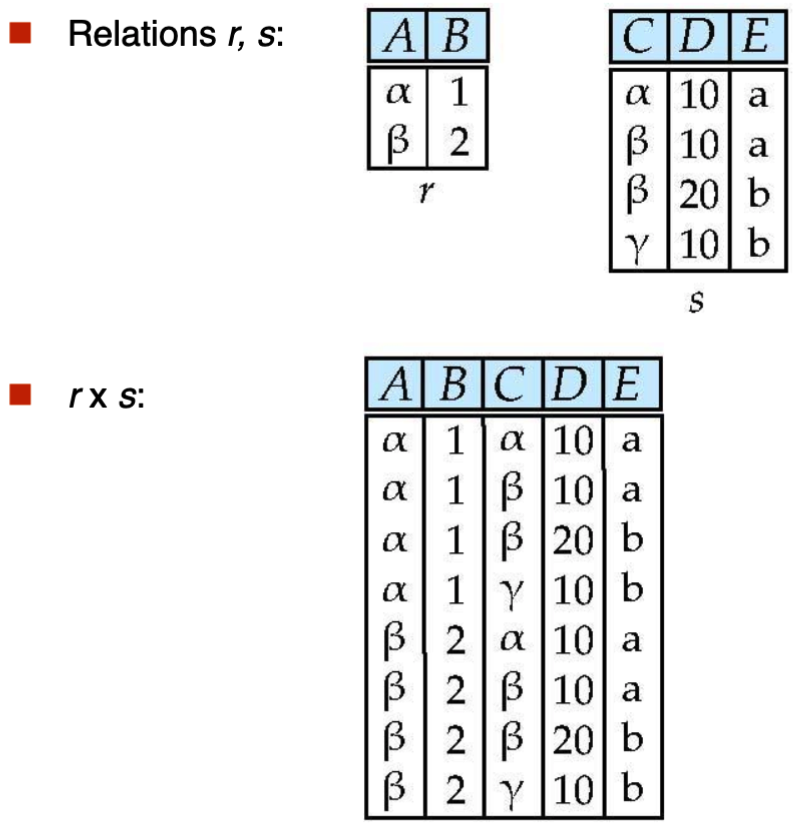

# Composition of Operators

- can build expressions using multiple operations

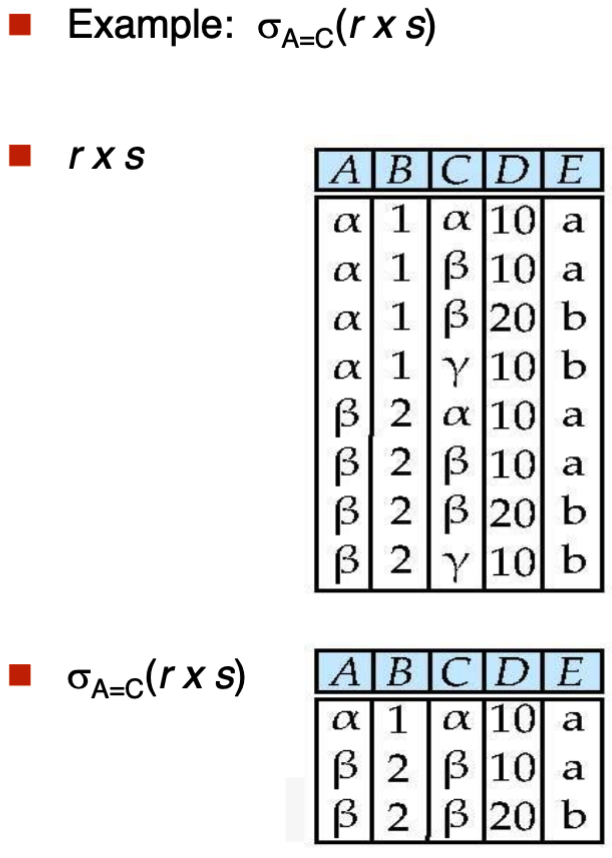

# Rename Operation

- allows us to name and refer to the results of relational-algebra expressions
- allows us to refer to a relation by more than one name
- example: $\rho_X(E)$ returns the expression $E$ under the name $X$
- if a relational-algebra expression $E$ has arity $n$, then
    - $\rho_{x(A_1, A_2, ..., A_n)}(E)$ returns the result of expression $E$ under the name $X$, and with the attributes renamed to $A_1, A_2, ..., A_n$

# Example Query

- find the largest salary in the university
    - step 1, find instructor salaries that are less than some other instructor salary (i.e, not maximum)
        - using a copy of instructor under a new name $d$
        - $\Pi_{instructor.salary}(\sigma_{instructor.salary < d.salary} (instructor\times \rho_d(instructor)))$
    - step 2, find the largest salary
        - $\Pi_{salary}(instructor) - \Pi_{instructor.salary}(\sigma_{instructor.salary < d.salary}(instructor \times \rho_d(instructor)))$

# Formal Definition of Relational Algebra

- a **basic expression** in the relational algebra consists of either a **relation in the database** (e.g., instructor) or a **constant relation**
- a general **relational algebra expression** is either a basic expression or an expression constructed recursively using one of the following rules, where $E_1$ and $E_2$ denote existing relational-algebra expressions
    - $E_1 \cup E_2$
    - $E_1 - E_2$
    - $E_1 \times E_2$
    - $\sigma_p(E_1)$, where $p$ is a predicate on attributes in $E_1$
    - $\Pi_s(E_1)$, where $S$ is a list comprising a subset of the attributes in $E_1$
    - $\rho_{\times(A_1, A_2, ..., A_n)}(E_1)$, where $\times(A_1, A_2, ..., A_n)$ is the new name for $E_1$ and its attributes


# Additional Operations

- for convenience, additional relational operators can be defined that do not add any expressive power to the relational algebra but simplify common queries
    - set intersection $\cap$
    - natural join $\bowtie$
    - theta join $\bowtie_{theta}$
    - assignment $\leftarrow$
    - set division $\div$
    - outer join

# Set-Interserction Operation

- notation: $r \cap s$
- defined as: $r \cap s = \{t|t\in r \land t \in s\}$
- assume:
    - $r, s$ have the same arity
    - attributes of $r$ and $s$ are compatible
- $r \cap s =r - (r-s)$

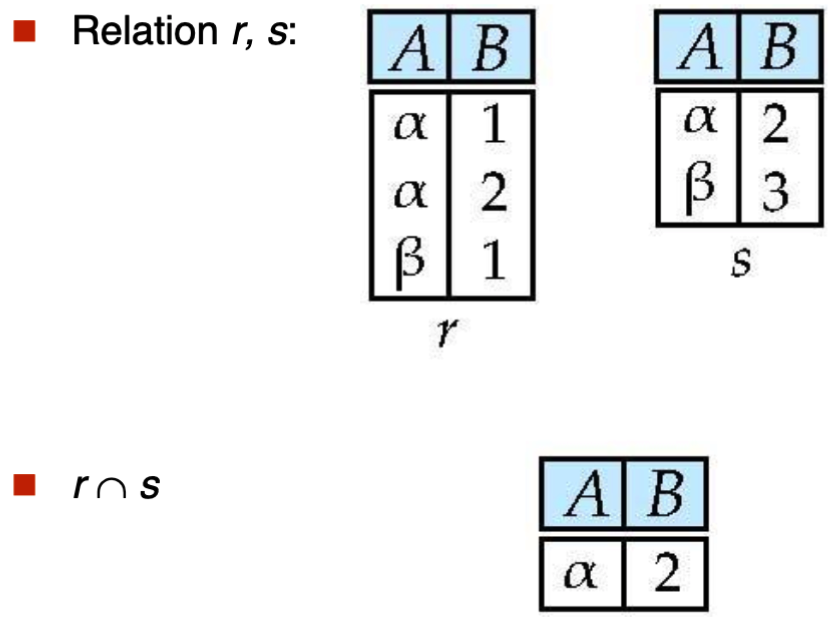

# Assignment Operation

- the assignment operation ($\leftarrow$) provides a convenient way to express complex queries
    - write query as a sequential program consisting of 
        - a series of assignments
        - followed by an expression whose value is displayed as a result of the query
    - assignment must always be made to a **temporary relation variable**
- example: find the largest salary in the university
    - $temp \leftarrow \Pi_{instructor.salary}(\sigma_{instructor.salary < d.salary}(instructor \times \rho_d(instructor)))$
    - $\Pi_{salary}(instructor) - temp$

# Natural-Join Operation

- notation: $r \bowtie s$
- let $r$ and $s$ be relations on schemas $R$ and $S$ respectively, then $r \bowtie s$ is a relation on schema $R \cup S$ obtained as follows
    - consider each pair of tuples $t_r$ from $r$ and $t_s$ from $s$
    - if $t_r$ and $t_s$ have the same value on each of the attributes in $R \cap S$, add a tuple $t$ to the result, where
        - $t$ has the same value as $t_r$ for attributes in $R$
        - $t$ has the same value as $t_s$ for attributes in $S$
- example
    - $R=(A,B,C,D), S=(E,B,D)$
    - result schema $(A,B,C,D,E)$
    - $r\bowtie s$ is defined as: $\Pi_{r.A, r.B, r.C, r.D, s.E}(\sigma_{r.B=s.B\land r.D=s.D}(r \times s))$

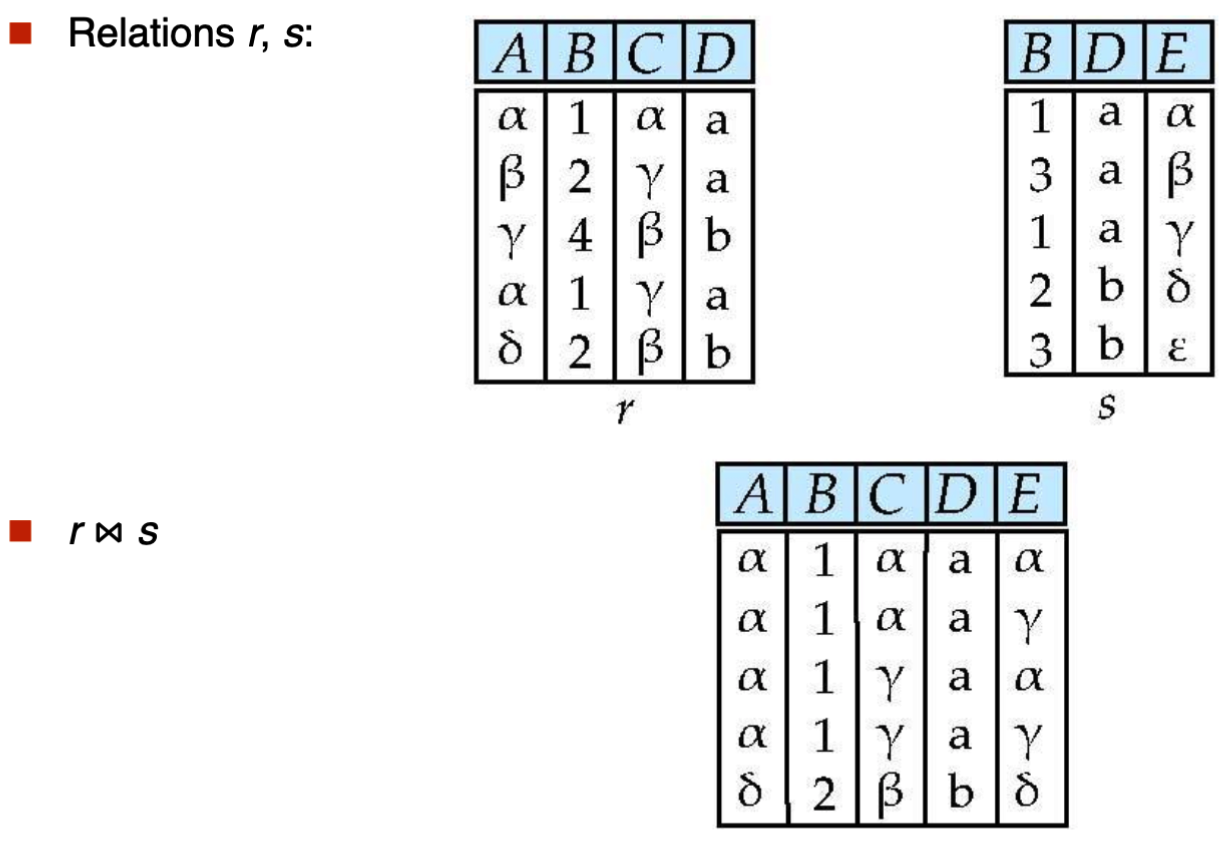

# Natural Join and Theta Join

- find the names of all instructors in CS department together with the course titles of all the courses that the insturctos teach
    - $\Pi_{name, title}(\sigma_{dept\_name}=\"Comp.Sci.\"(instructor \bowtie teaches \bowtie course))$
- natural join is **associative**
    - $(instructor \bowtie teaches) \bowtie course$ = $instructor \bowtie (teaches \bowtie course)$
- natural join is **commutative**
    - $instructor \bowtie teaches$ = $ teaches \bowtie instructor$
    - tuples in the relational model are unordered
- the **theta join** operation $r\bowtie_{\theta}s$ is defined as
    - $r\bowtie_{\theta}s$ = $\sigma_{\theta}(r \times s)$

- example: pet(p_id, name, species), owner(o_id, name, address), owns(p_id, o_id)
    - query: find the name and address of every dog that has an owner
    - $temp \leftarrow (pet \bowtie owns)$
    - $temp2 \leftarrow temp \bowtie_{temp.o_id = owner.o_id}owner$
    - $\Pi_{temp.name, address}(\sigma_{species="dog"}(temp2))$

# Division Operator

- given relations $r(R)$ and $s(S)$, such that $S \subset R$, then $r \div s$ is the largest relation $t(R-S)$ such that $t \times s \subseteq r$
- example, $r(ID, course_id) = \Pi_{ID, course\_id}(takes)$ and $s(course_id)=\Pi_{course\_id}(\sigma_{dept\_name="Biology"}(course))$
    - then $r \div s$ gives students who have taken all the courses in the biology department
